# 🛒 FMCG Market Basket Analysis - Zimbabwean FMCG Shop

This notebook analyzes simulated purchase data for a small FMCG shop in Zimbabwe. Using the Apriori algorithm, we identify product combinations that frequently occur together. The goal is to provide real-world recommendations for bundling, promotions, shelf placement, and upselling.

# 🔢 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# 📁 2. Load Dataset

In [2]:
df = pd.read_csv("C:/Users/alfre/zim_market_basket_analysis/pythonProject/Scripts/fmcg_shop_data.csv")
df.head(10)

,Transaction ID,Date,Item,Quantity
0,T0001,17-05-2025,"('Steel Wool 4 pieces', 0.5)",1
1,T0001,17-05-2025,"('Sweets (assorted)', 0.1)",1
2,T0001,17-05-2025,"('Cerevita 500g', 3.5)",2
3,T0001,17-05-2025,"('Margarine 500g', 2.0)",2
4,T0001,17-05-2025,"('Mazoe 2L', 4.0)",2
5,T0001,17-05-2025,"('Cooking Oil 2L', 2.0)",2
6,T0001,17-05-2025,"('Body Cream 250ml', 3.0)",1
7,T0001,17-05-2025,"('Tea Leaves 150g', 1.0)",2
8,T0001,17-05-2025,"('Pop Corn 500g', 1.0)",3
9,T0002,10-05-2025,"('Fanta Orange 500ml', 0.5)",2


There are four columns:
Transaction ID - Processed transaction ID. Similar to a receipt number.
Date - the date the transaction was made
Item - the item or product sold including its price in USD; i.e., 0.5 is $0.50 (or 50c)
Quantity - number of items of the same item

# 📊 3. Data Summary

Let’s inspect the basic structure of our dataset to understand what we're working with.


In [3]:
# A summary of our dataframe.
# The number of non-null entries
# The data types of columns 

df.info()
df.describe()
print("Unique Items:", df['Item'].nunique())
print("Unique Transactions:", df['Transaction ID'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49233 entries, 0 to 49232
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  49233 non-null  object
 1   Date            49233 non-null  object
 2   Item            49233 non-null  object
 3   Quantity        49233 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
Unique Items: 53
Unique Transactions: 9000


In [4]:
# This shows there is no missing values in any of the rows and columns entries

df.isna().sum()

Transaction ID    0
Date              0
Item              0
Quantity          0
dtype: int64

# 🔝 4. Top-Selling Products

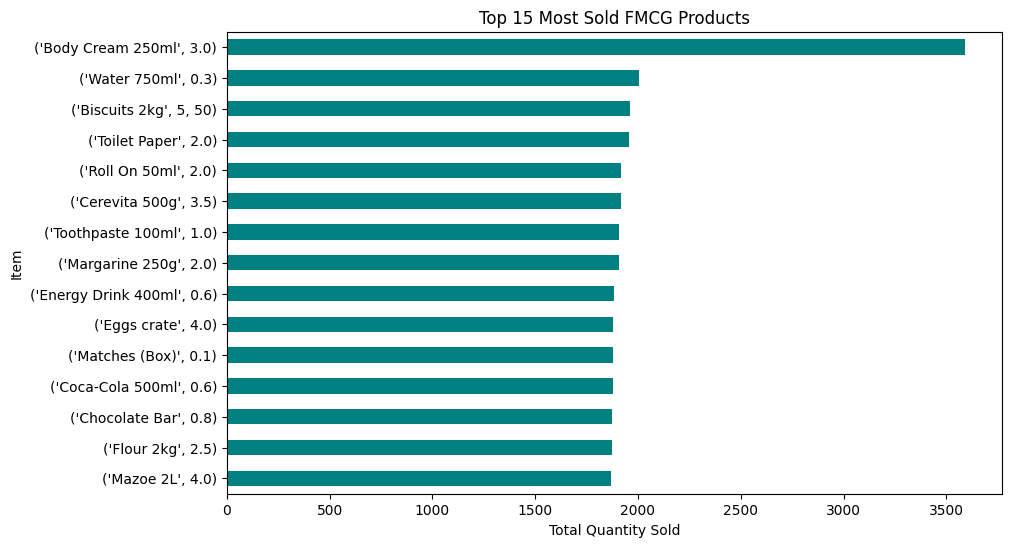

In [5]:
top_items = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_items.plot(kind="barh", color="teal")
plt.gca().invert_yaxis()
plt.title("Top 15 Most Sold FMCG Products")
plt.xlabel("Total Quantity Sold")
plt.show()

## 🔄 5. Create Basket Matrix

To perform market basket analysis, we need to convert our dataset into a format where each row is a transaction and each column is a product. The values will indicate whether an item was present in the transaction (1) or not (0).

In [6]:
basket_cart = df.pivot_table(
    index='Transaction ID',
    columns='Item',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Convert quantities to 1s and 0s (presence of item)
basket_cart = basket_cart.map(lambda x: 1 if x > 0 else 0)

basket_cart.head()

Item,"('Bathing Soap 175g', 1.0)","('Biscuits 2kg', 5, 50)","('Biscuits 500g', 2.0)","('Body Cream 250ml', 3.0)","('Body Spray 200ml', 3.0)","('Cerevita 500g', 3.5)","('Chilli Sauce', 1.0)","('Chocolate Bar', 0.8)","('Coca-Cola 500ml', 0.6)","('Cooking Oil 2L', 2.0)",...,"('Sprite 500ml', 0.6)","('Steel Wool 4 pieces', 0.5)","('Sugar 2kg', 2.5)","('Sweets (assorted)', 0.1)","('Tea Bags 100g', 1.2)","('Tea Leaves 150g', 1.0)","('Toilet Paper', 2.0)","('Toothpaste 100ml', 1.0)","('Vaseline 100ml', 1.0)","('Water 750ml', 0.3)"
Transaction ID,,,,,,,,,,,,,,,,,,,,,
T0001,0,0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
T0002,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
T0003,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T0004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
T0005,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


Next step is to extract the real gold now. Which is frequent itemsets and association rules using the Apriori algorithm.

The Apriori algorithm is a classic association rule mining technique used in market basket analysis to discover
frequent itemsets and generate rules like:
"If a customer buys bread and eggs, they are likely to buy milk."

## 📈 6. Frequent Itemsets (Applying Apriori Algorithm)

In [7]:
# Finding frequent itemsets with minimum support of 3%
basket = basket_cart.astype(bool)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Sort from most to least frequent
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

frequent_itemsets.head(10)

,support,itemsets
3,0.184778,"(('Body Cream 250ml', 3.0))"
52,0.108778,"(('Water 750ml', 0.3))"
1,0.107556,"(('Biscuits 2kg', 5, 50))"
49,0.107333,"(('Toilet Paper', 2.0))"
37,0.107111,"(('Roll On 50ml', 2.0))"
50,0.105778,"(('Toothpaste 100ml', 1.0))"
5,0.105556,"(('Cerevita 500g', 3.5))"
22,0.105000,"(('Margarine 250g', 2.0))"
8,0.105000,"(('Coca-Cola 500ml', 0.6))"
17,0.104444,"(('Instant Noodles (5 packets)', 1.0))"


# 🔗 7. Association Rules

In [8]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Sort by lift (strength of association)
rules = rules.sort_values(by="lift", ascending=False)

rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
1,"('Mealie Meal 5kg', 3.5)","('Body Cream 250ml', 3.0)",0.023778,0.232104,1.256126
14,"('Powdered Soup Mix Box', 3.0)","('Body Cream 250ml', 3.0)",0.021889,0.231765,1.254289
5,"('Sweets (assorted)', 0.1)","('Body Cream 250ml', 3.0)",0.022667,0.224917,1.217231
0,"('Toilet Paper', 2.0)","('Body Cream 250ml', 3.0)",0.023889,0.222567,1.204513
12,"('Sanitary Pads (pack)', 2.0)","('Body Cream 250ml', 3.0)",0.022222,0.222469,1.203984
2,"('Chocolate Bar', 0.8)","('Body Cream 250ml', 3.0)",0.023111,0.222460,1.203932
6,"('Painkillers (blister)', 0.3)","('Body Cream 250ml', 3.0)",0.022667,0.221258,1.197428
10,"('Chilli Sauce', 1.0)","('Body Cream 250ml', 3.0)",0.022333,0.220637,1.194065
19,"('Bathing Soap 175g', 1.0)","('Body Cream 250ml', 3.0)",0.021667,0.219595,1.188425
13,"('Vaseline 100ml', 1.0)","('Body Cream 250ml', 3.0)",0.022000,0.218543,1.182734


The resulting columns and what they mean.
`antecedents` -  The item(s) that come first (the “if” part)                                
`consequents` - The item(s) that follow (the “then” part)                                  
`support` - % of all transactions that contain both `antecedent` and `consequent`      
`confidence` - How often `consequent` is bought when `antecedent` is bought               
`lift` - How much more often they occur together than by chance (lift > 1 = strong) 


# 📊 8. Visualize Association Rules

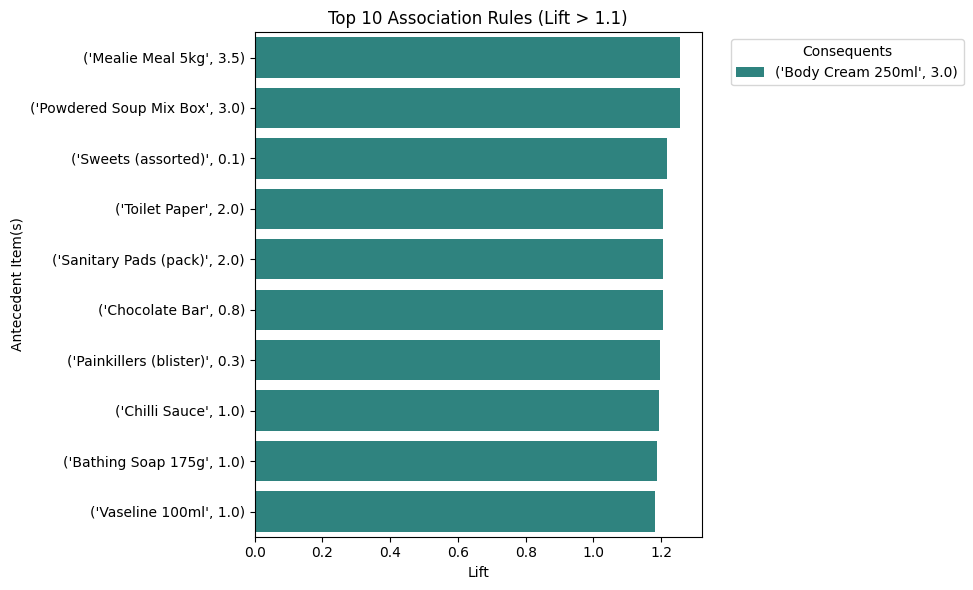

In [9]:
# Bar Plot of Top Rules (By Lift)

plt.figure(figsize=(10,6))
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

sns.barplot(
    x='lift',
    y='antecedents',
    data=top_rules,
    hue='consequents',
    dodge=False,
    palette='viridis'
)

plt.title("Top 10 Association Rules (Lift > 1.1)")
plt.xlabel("Lift")
plt.ylabel("Antecedent Item(s)")
plt.legend(title="Consequents", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Building a Mini Recommendation Engine

In [10]:
# Creating a simple function that, when given a product, recommends likely pairings based on your rules.

def recommend_items(product, rules_df, top_n=3):
    matched = rules_df[rules_df['antecedents'].str.contains(product, case=False)]

    if matched.empty:
        print(f"❌ No strong associations found for '{product}'")
        return

    print(f"✅ Recommendations for '{product}':")
    for idx, row in matched.sort_values(by='lift', ascending=False).head(top_n).iterrows():
        print(f"→ Buy with: {row['consequents']} | Confidence: {row['confidence']:.2f} | Lift: {row['lift']:.2f}")


In [11]:
recommend_items("Body Cream", rules)
recommend_items("Mealie Meal", rules)
recommend_items("Salt", rules)
recommend_items("Kapenta", rules)


❌ No strong associations found for 'Body Cream'
✅ Recommendations for 'Mealie Meal':
→ Buy with: ('Body Cream 250ml', 3.0) | Confidence: 0.23 | Lift: 1.26
❌ No strong associations found for 'Salt'
✅ Recommendations for 'Kapenta':
→ Buy with: ('Body Cream 250ml', 3.0) | Confidence: 0.22 | Lift: 1.17
